In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [4]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
import os
import cv2
import numpy as np

image_directory = 'datasets/'
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for label in labels:
    folderPath = os.path.join(image_directory, 'Training', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

for label in labels:
    folderPath = os.path.join(image_directory, 'Testing', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [7]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

C:\Users\DHANE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.2893 - loss: 3.9356 - val_accuracy: 0.4660 - val_loss: 1.1547
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5033 - loss: 1.1257 - val_accuracy: 0.5408 - val_loss: 1.0773
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.5744 - loss: 0.9544 - val_accuracy: 0.5986 - val_loss: 0.9456
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6596 - loss: 0.8407 - val_accuracy: 0.6224 - val_loss: 0.7832
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.6757 - loss: 0.7566 - val_accuracy: 0.7279 - val_loss: 0.6789
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.7181 - loss: 0.6794 - val_accuracy: 0.6361 - val_loss: 0.7388
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.7755 - loss: 0.5681 - val_accuracy: 0.7687 - val_loss: 0.6202
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8102 - loss: 0.4944 - val_accuracy: 0.7177 - v

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

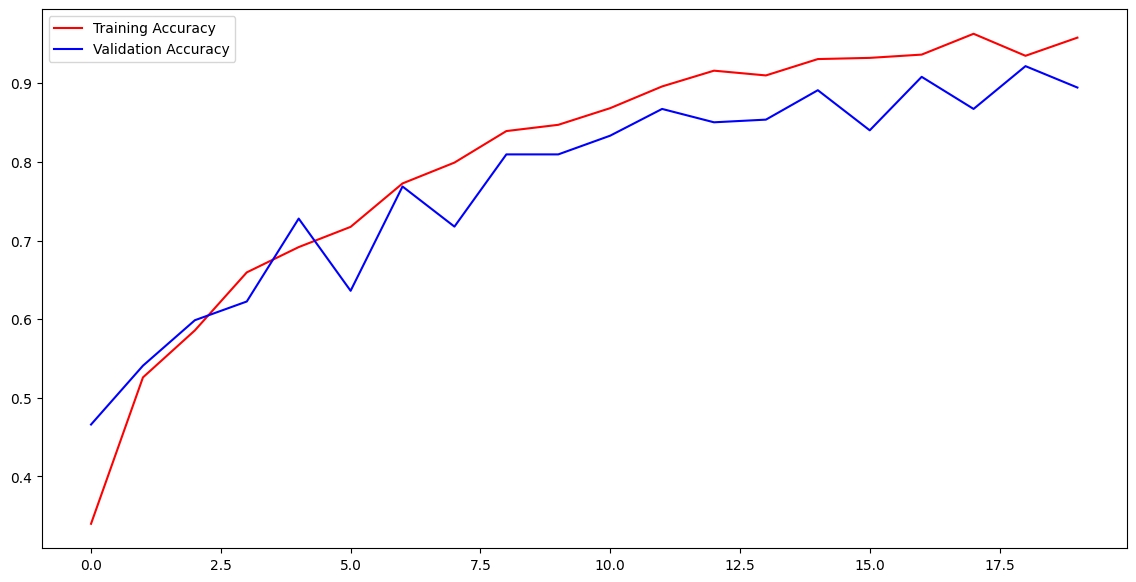

In [15]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

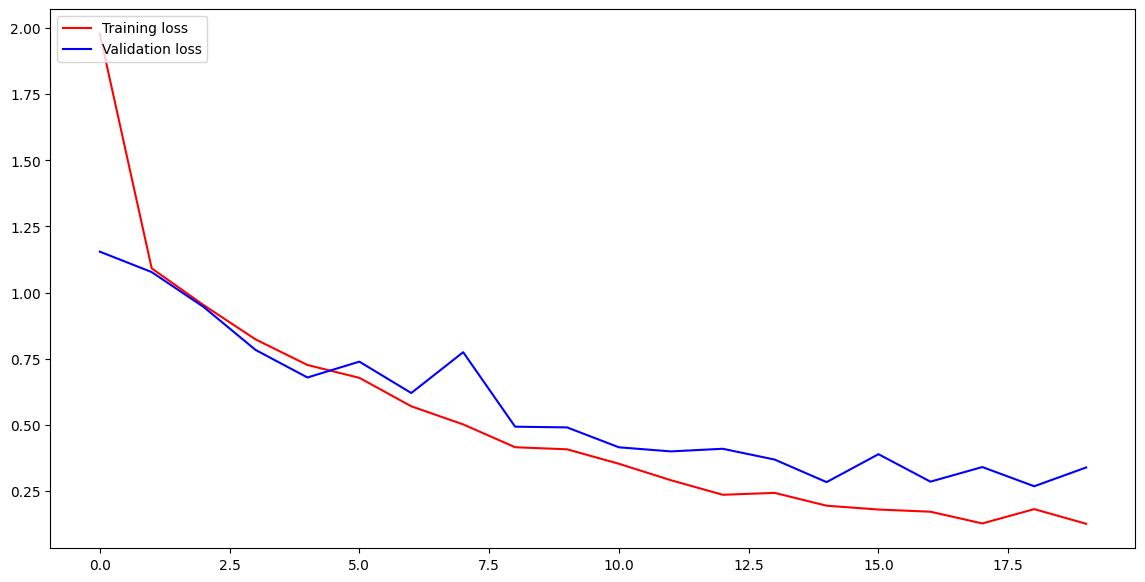

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [19]:
# img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
# img = cv2.resize(img,(150,150))
# img_array = np.array(img)
# img_array.shape

# no_tumor_images = os.listdir(image_directory+ 'no/')
import cv2
import numpy as np

# Path to the image file
# Path to the image file
image_directory = 'datasets/'
image_path = image_directory + 'Training/pituitary_tumor/p (107).jpg'


# Try to read the image and handle potential errors
try:
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if img is not None:
        # Resize the image
        img = cv2.resize(img, (150, 150))
        
        # Convert the image to a NumPy array
        img_array = np.array(img)
        
        # Output the shape of the image array
        print("Shape of the image array:", img_array.shape)
    else:
        print("Error: Unable to read the image file.")
except Exception as e:
    print("Error:", e)


Shape of the image array: (150, 150, 3)


In [20]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

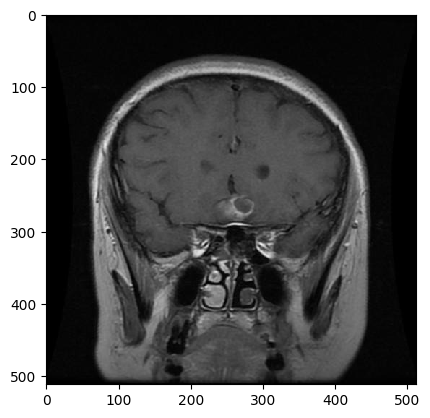

In [22]:
from tensorflow.keras.preprocessing import image
# img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = image.load_img(image_directory + 'Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [24]:
# Pituitary Tumor
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


3

No Tumor

Shape of the image array: (150, 150, 3)
(1, 150, 150, 3)


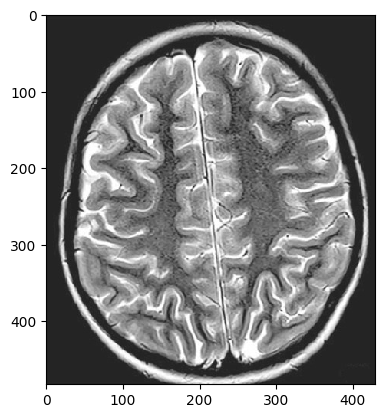

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2


In [30]:
# img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
# img = cv2.resize(img,(150,150))
# img_array = np.array(img)
# img_array.shape

# no_tumor_images = os.listdir(image_directory+ 'no/')
import cv2
import numpy as np

# Path to the image file
# Path to the image file
image_directory = 'datasets/'
image_path = image_directory + 'Training/no_tumor/image(317).jpg'


# Try to read the image and handle potential errors
try:
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if img is not None:
        # Resize the image
        img = cv2.resize(img, (150, 150))
        
        # Convert the image to a NumPy array
        img_array = np.array(img)
        
        # Output the shape of the image array
        print("Shape of the image array:", img_array.shape)
    else:
        print("Error: Unable to read the image file.")
except Exception as e:
    print("Error:", e)
    
    


img_array = img_array.reshape(1,150,150,3)
print(img_array.shape)




from tensorflow.keras.preprocessing import image
# img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = image.load_img(image_directory + 'Training/no_tumor/image(317).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


a=model.predict(img_array)
indices = a.argmax()
print(indices)

Glioma_Tumor

Shape of the image array: (150, 150, 3)
(1, 150, 150, 3)


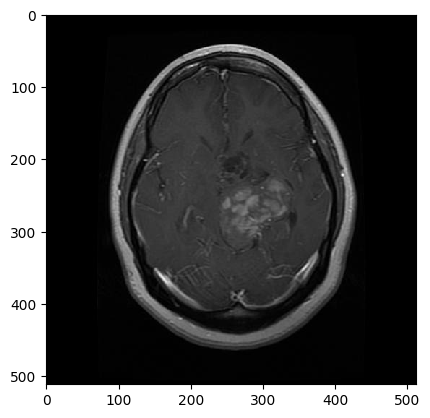

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
0


In [33]:
# img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
# img = cv2.resize(img,(150,150))
# img_array = np.array(img)
# img_array.shape

# no_tumor_images = os.listdir(image_directory+ 'no/')
import cv2
import numpy as np

# Path to the image file
# Path to the image file
image_directory = 'datasets/'
image_path = image_directory + 'Training/glioma_tumor/gg (1).jpg'


# Try to read the image and handle potential errors
try:
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if img is not None:
        # Resize the image
        img = cv2.resize(img, (150, 150))
        
        # Convert the image to a NumPy array
        img_array = np.array(img)
        
        # Output the shape of the image array
        print("Shape of the image array:", img_array.shape)
    else:
        print("Error: Unable to read the image file.")
except Exception as e:
    print("Error:", e)
    
    


img_array = img_array.reshape(1,150,150,3)
print(img_array.shape)




from tensorflow.keras.preprocessing import image
# img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = image.load_img(image_directory + 'Training/glioma_tumor/gg (1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


a=model.predict(img_array)
indices = a.argmax()
print(indices)

Meningioma Tumor

Shape of the image array: (150, 150, 3)
(1, 150, 150, 3)


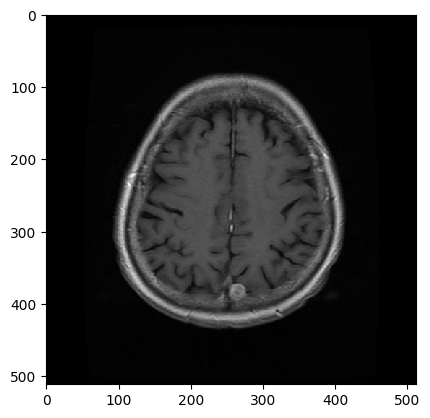

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1


In [34]:
# img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
# img = cv2.resize(img,(150,150))
# img_array = np.array(img)
# img_array.shape

# no_tumor_images = os.listdir(image_directory+ 'no/')
import cv2
import numpy as np

# Path to the image file
# Path to the image file
image_directory = 'datasets/'
image_path = image_directory + 'Training/meningioma_tumor/m (4).jpg'


# Try to read the image and handle potential errors
try:
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if img is not None:
        # Resize the image
        img = cv2.resize(img, (150, 150))
        
        # Convert the image to a NumPy array
        img_array = np.array(img)
        
        # Output the shape of the image array
        print("Shape of the image array:", img_array.shape)
    else:
        print("Error: Unable to read the image file.")
except Exception as e:
    print("Error:", e)
    
    


img_array = img_array.reshape(1,150,150,3)
print(img_array.shape)




from tensorflow.keras.preprocessing import image
# img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = image.load_img(image_directory + 'Training/meningioma_tumor/m (4).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


a=model.predict(img_array)
indices = a.argmax()
print(indices)

In [39]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_tumor(image_path):
    try:
        # Read the image
        img = cv2.imread(image_path)
        
        # Check if the image was successfully loaded
        if img is not None:
            # Resize the image
            img = cv2.resize(img, (150, 150))
            
            # Convert the image to a NumPy array
            img_array = np.array(img)
            
            # Reshape the array for model input
            img_array = img_array.reshape(1, 150, 150, 3)
            
            # Predict using the model
            prediction = model.predict(img_array)
            predicted_class_index = prediction.argmax()
            return predicted_class_index
        else:
            print("Error: Unable to read the image file:", image_path)
            return None
    except Exception as e:
        print("Error:", e)
        return None

# Path to the directory containing image datasets
image_directory = 'datasets/Training/'

# Test for different tumor types
tumor_types = ['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor']

for tumor_type in tumor_types:
    image_path = f"{image_directory}/{tumor_type}/"
    if tumor_type == 'no_tumor':
        image_path += 'image(317).jpg'  # For 'no_tumor' class
    elif tumor_type == 'meningioma_tumor':
        image_path += 'm2 (89).jpg'
    elif tumor_type == 'glioma_tumor':
        image_path += 'gg (11).jpg' 
    else:
        image_path += f'{tumor_type[0]} (1).jpg'  # For other tumor classes
    
    predicted_class_index = predict_tumor(image_path)
    if predicted_class_index is not None:
        print(f"Predicted class index for {tumor_type}: {predicted_class_index}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class index for pituitary_tumor: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class index for no_tumor: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class index for glioma_tumor: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class index for meningioma_tumor: 1
